In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import optim

from benchmark import dataset
import time
import math
import numpy as np
import  wandb
import os
from Methods import LSTM, Transformer
import utils 
from train import load, save, plot

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


ModuleNotFoundError: No module named 'LSTM'

In [3]:
key_file = './wandb-key.txt'

if os.path.exists(key_file):
    with open(key_file) as f:
        key = f.readline().strip()
    wandb.login(key=key)
else:
    print("Key file does not exist. Please create the key file with your wandb API key.")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\USER/.netrc


In [4]:
seed = 3
wandb_enable = True

info = {'num_epoch' :10,
        'lr' : 0.1,
        'weight_decay' : 0.00001,
        'device' : 'cuda',
        'reset': True,
        'name_load' : 'TR4.312',#  
        'model_load_path' : './model/Transformer/',
        'model_save_path' : './model/Transformer/'
        }



In [5]:
wandb_arg_name = 'normal-transformer without dropout'
wandb.init(
        project='Language-Modeling',
        name=wandb_arg_name,
        config={
            'lr': info['lr'],
            'weight_decay': info['weight_decay'],
            'num_epoch': info['num_epoch']
        }
    )


In [6]:
loss_train_hist = []
loss_valid_hist = []

metric_train_hist = []
metric_valid_hist = []

In [7]:
batch_size = 80
seq_len = 70


load_path = info['model_load_path'] + info['name_load'] + ".pth"

train_loader = dataset.WikiText2('train')(batch_size=batch_size, seq_len=seq_len)
valid_loader = dataset.WikiText2('valid')(batch_size=batch_size, seq_len=seq_len)
vocab = dataset.WikiText2('train').vocab


# model = LSTM.awd_lstm(num_token_vocab=len(vocab))
model = Transformer.normal_encoder(num_token_vocab=len(vocab))

optimizer = optim.SGD(model.parameters(), lr=info['lr'], weight_decay=info['weight_decay'], momentum=0.9)# , nesterov=True

loss_fn = nn.CrossEntropyLoss()



model, loss_fn, _ = load(model, loss_fn, optimizer, device=info['device'], reset = info['reset'], load_path = load_path)

best_loss_valid = torch.inf
save_path = info['model_save_path'] + 'model'+ ".pth"

In [27]:
epochs = info['num_epoch']

for epoch in range(1, epochs+1):
    _, loss_train, metric_train = utils.train_one_epoch(model, train_loader, loss_fn, optimizer, epoch=epoch, device='cuda')
    loss_valid, metric_valid = utils.evaluate(model, valid_loader, loss_fn, device='cuda')

        
    loss_train_hist.append(loss_train)
    loss_valid_hist.append(loss_valid)

    metric_train_hist.append(metric_train)
    metric_valid_hist.append(metric_valid)


    print(f'Train      - Loss:{loss_train}  Metric:{metric_train}')
    print(f'Validation - Loss:{loss_valid}  Metric:{metric_valid}')
    print()

    if loss_valid < best_loss_valid:
        save(save_path, model, optimizer, loss_fn)
        best_loss_valid = loss_valid
        print('Model Saved!')

    if wandb_enable:
        wandb.log({"metric_train": metric_train, "loss_train": loss_train,
                   "metric_valid": metric_valid, "loss_valid": loss_valid})





Epoch 1:   0%|          | 0/367 [00:00<?, ?batch/s]

Epoch 1: 100%|██████████| 367/367 [01:15<00:00,  4.83batch/s, loss=2.72, metric=15.2]


Train      - Loss:2.721511582912476  Metric:15.20289134979248
Validation - Loss:3.7781507663237743  Metric:43.561302185058594

Model Saved!


Epoch 2: 100%|██████████| 367/367 [01:16<00:00,  4.78batch/s, loss=2.71, metric=15]  


Train      - Loss:2.7092407327906636  Metric:15.016292572021484
Validation - Loss:3.7831716415209646  Metric:44.074188232421875



Epoch 3: 100%|██████████| 367/367 [01:16<00:00,  4.77batch/s, loss=2.7, metric=14.8] 


Train      - Loss:2.696702441337648  Metric:14.830597877502441
Validation - Loss:3.77946207462213  Metric:43.71062469482422



Epoch 4: 100%|██████████| 367/367 [01:16<00:00,  4.77batch/s, loss=2.69, metric=14.7]


Train      - Loss:2.6857330818592042  Metric:14.674099922180176
Validation - Loss:3.788746803234785  Metric:44.091793060302734



Epoch 5: 100%|██████████| 367/367 [01:16<00:00,  4.78batch/s, loss=2.67, metric=14.5]


Train      - Loss:2.674367488892267  Metric:14.502280235290527
Validation - Loss:3.781896731792352  Metric:43.75384521484375



Epoch 6: 100%|██████████| 367/367 [01:15<00:00,  4.85batch/s, loss=2.66, metric=14.3]


Train      - Loss:2.66269200374385  Metric:14.325862884521484
Validation - Loss:3.7814323963263097  Metric:43.896759033203125



Epoch 7: 100%|██████████| 367/367 [01:15<00:00,  4.89batch/s, loss=2.65, metric=14.2]


Train      - Loss:2.6509297907514857  Metric:14.169990539550781
Validation - Loss:3.7806736689347487  Metric:43.76967239379883



Epoch 8: 100%|██████████| 367/367 [01:15<00:00,  4.86batch/s, loss=2.64, metric=14]  


Train      - Loss:2.639584896025281  Metric:13.999768257141113
Validation - Loss:3.7813786298800736  Metric:43.78550338745117



Epoch 9: 100%|██████████| 367/367 [01:16<00:00,  4.78batch/s, loss=2.63, metric=13.8]


Train      - Loss:2.6285939918227026  Metric:13.849735260009766
Validation - Loss:3.7931916897113505  Metric:44.50981903076172



Epoch 10: 100%|██████████| 367/367 [01:16<00:00,  4.78batch/s, loss=2.62, metric=13.7]


Train      - Loss:2.6162238861624485  Metric:13.684158325195312
Validation - Loss:3.783437808354696  Metric:44.01996994018555




Trained 100 epochs


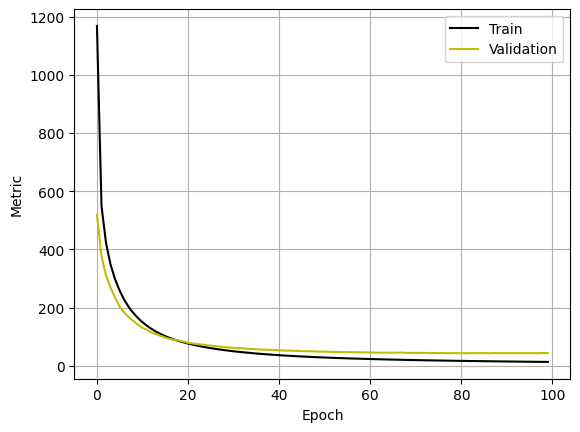


Trained 100 epochs


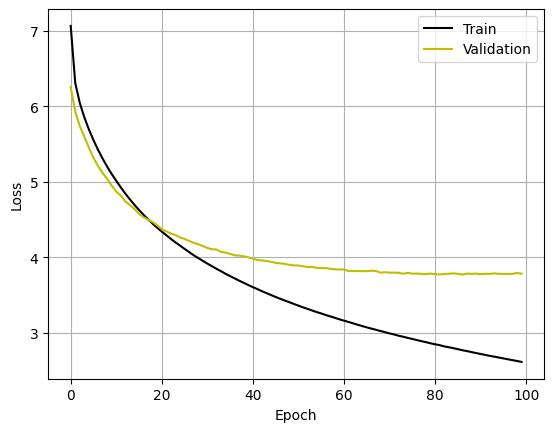

In [28]:
plot(metric_train_hist, metric_valid_hist, "Metric")
plot(loss_train_hist, loss_valid_hist, 'Loss')